In [256]:
import numpy as np

def f(x, a, b):
    return (1 + np.exp(a+b))/(1 + np.exp(a/x + b))

In [257]:
import matplotlib.pyplot as plt

%matplotlib inline

a_ = np.linspace(0, 4, 4)
b_ = np.linspace(-2, 4, 4)

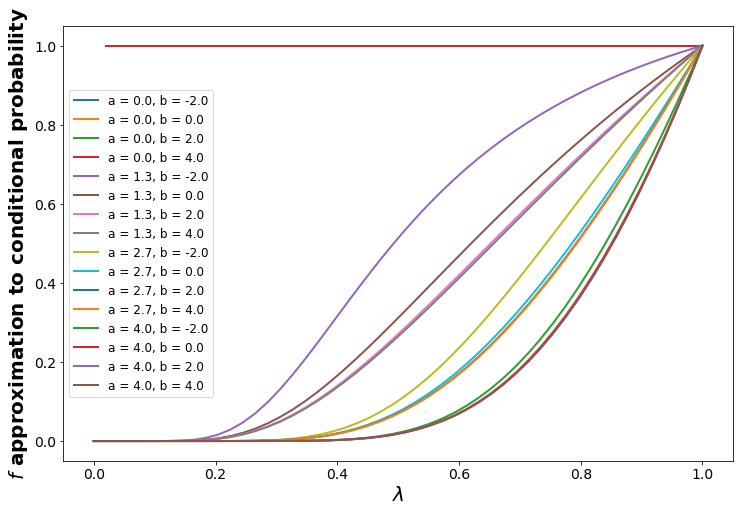

In [258]:
x = np.linspace(0, 1, 50)

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for a in a_:
    for b in b_:
        y = f(x, a, b)
        plt.plot(x, y, linewidth = 2, label = "a = " + str(round(a, 1)) + ", b = " + str(round(b, 1)))
        
plt.xlabel('$\lambda$', fontsize = 20, fontweight = 'bold')
plt.ylabel('$f$ approximation to conditional probability', fontsize = 20, fontweight = 'bold')

plt.legend(loc=0, prop={'size': 12})
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('CPT_function.pdf')

In [322]:
probs = np.array([0.00980392156862745, 0.3137254901960784])

#0.0196078431372549, 0.029411764705882353, 0.0392156862745098, 0.049019607843137254, 0.058823529411764705, 0.08823529411764706, 

totalContr = 1.735294117647057

In [323]:
lambda_ = probs/totalContr

In [324]:
from sklearn.linear_model import LinearRegression

y = np.log(1/probs - 1).reshape(-1, 1)

x = lambda_.reshape(-1, 1)

reg = LinearRegression().fit(x, y)

In [325]:
reg.score(x, y)

1.0

In [326]:
a = reg.coef_
a

array([[-21.88154608]])

In [327]:
b = reg.intercept_
b

array([4.73874507])

In [328]:
def obj(x):
    diff = (1 + np.exp(x[0]+x[1]))/(1 + np.exp(x[0]/lambda_ + x[1])) - probs
    return np.sum(diff**2)

from scipy.optimize import minimize

x_0 = [-1, 1]

res = minimize(obj, x_0, method='Powell', tol=1e-6)

In [329]:
res

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-8.10603220e-11, -7.30805154e-14]])
     fun: 9.611687812379854e-05
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 2
  status: 0
 success: True
       x: array([0.29384397, 1.00116647])

In [330]:
a = res.x[0]
b = res.x[1]

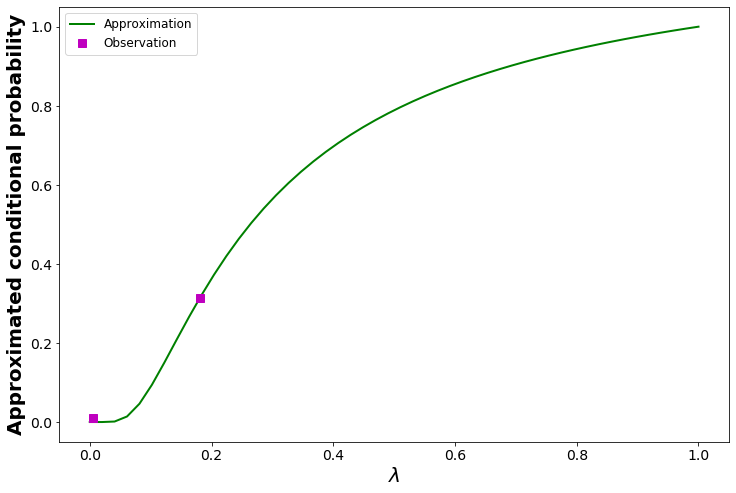

In [342]:
x__ = np.linspace(0, 1, 50)

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

plt.plot(x__, f(x__, a, b).flatten(), 'g', linewidth = '2', label = 'Approximation')
plt.plot(lambda_, probs, 'ms', markersize = 8, label = 'Observation')

plt.xlabel('$\lambda$', fontsize = 20, fontweight = 'bold')
plt.ylabel('Approximated conditional probability', fontsize = 20, fontweight = 'bold')
plt.legend(loc=0, prop={'size': 12})
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('cpt_demo.pdf')